In [1]:
import sys
sys.path.append('../../../src')
from dimer_model_fit import *
from helpers import *
# from matplotlib.font_manager import FontProperties
%matplotlib notebook

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### Import data

In [2]:
df_main = pd.read_csv('df_main.csv')
df_s1 = pd.read_csv('df_s1.csv')
df_s2 = pd.read_csv('df_s2.csv')

# Association constants expressed in log10 form 
Ka_wt = 6.446 # <- AUC measurement
Ka_mut = 6.446 # <- initial guess
Km = 2.5 # <- initial guass

### Analysis with shared Km

In [3]:
analysis1 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis2 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis3 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis4 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis5 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis6 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)

### Analysis with unshared Km

In [4]:
# df_main_wt = df_main[df_main.Line.isin(['lp637', 'nwg201'])]
# df_main_mut = df_main[df_main.Line.isin(['nwg338', 'nwg369'])]
# df_s1_wt = df_s1[df_s1.Line.isin(['lp637', 'nwg201'])]
# df_s1_mut = df_s1[df_s1.Line.isin(['nwg338', 'nwg369'])]
# df_s2_wt = df_s2[df_s2.Line.isin(['lp637', 'nwg201'])]
# df_s2_mut = df_s2[df_s2.Line.isin(['nwg338', 'nwg369'])]

# analysis7 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis8 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis9 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]

# analysis10 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis11 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis12 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]

### Table 1

In [5]:
# def create_row(analysis, D, km_shared):
#     # Extract data
#     if km_shared:
#         fix_wt = analysis.fix_wt
#         ka_full_wt = analysis.ka_full[0]
#         ka_full_L109R = analysis.ka_full[1]
#         kas_wt = analysis.kas[0]
#         kas_L109R = analysis.kas[1]
#         km_full_wt = analysis.km_full
#         km_full_L109R = analysis.km_full
#         kms_wt = analysis.kms
#         kms_L109R = analysis.kms
#     else:
#         fix_wt = analysis[0].fix_ka
#         ka_full_wt = analysis[0].ka_full
#         ka_full_L109R = analysis[1].ka_full
#         kas_wt = analysis[0].kas
#         kas_L109R = analysis[1].kas
#         km_full_wt = analysis[0].km_full
#         km_full_L109R = analysis[1].km_full
#         kms_wt = analysis[0].kms
#         kms_L109R = analysis[1].kms

#     # D
#     row = {r'$D$' + ' (nm)': str(D)}

#     # ka wt fixed?
#     if fix_wt:
#         row[r'$K_a$' + ' WT fixed?'] = '✓'
#     else:
#         row[r'$K_a$' + ' WT fixed?'] = 'x'

#     # km shared
#     if km_shared:
#         row[r'$K_m$' + ' shared?'] = '✓'
#     else:
#         row[r'$K_m$' + ' shared?'] = 'x'

#     # # KD wt
#     # a = 2 / np.exp(ka_full_wt) * 1e9
#     # [low, high] = np.percentile(2 / np.exp(kas_wt) * 1e9, [2.5, 97.5])
#     # if not fix_wt:
#     #     row[r'$K_D$' + ' WT (nM)'] = f'{a:.0f} [{low:.0f}, {high:.0f}]'
#     # else:
#     #     row[r'$K_D$' + ' WT (nM)'] = f'{a:.0f}'

#     # ka wt
#     a = ka_full_wt
#     [low, high] = np.percentile(kas_wt, [2.5, 97.5])
#     if not fix_wt:
#         row[r'$K_a$' + ' WT'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
#     else:
#         row[r'$K_a$' + ' WT'] = f'{a:.2f}'

#     # # KD mut
#     # a = 2 / np.exp(ka_full_L109R) * 1e9
#     # [low, high] = np.percentile(2 / np.exp(kas_L109R) * 1e9, [2.5, 97.5])
#     # row[r'$K_D$' + ' L109R (nM)'] = f'{a:.0f} [{low:.0f}, {high:.0f}]'

#     # ka mut
#     a = ka_full_L109R
#     [low, high] = np.percentile(kas_L109R, [2.5, 97.5])
#     row[r'$K_a$' + ' L109R'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'

#     # km wt
#     a = km_full_wt
#     [low, high] = np.percentile(kms_wt, [2.5, 97.5])
#     row[r'$K_m$' + ' WT'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'

#     # km L109R
#     a = km_full_L109R
#     [low, high] = np.percentile(kms_L109R, [2.5, 97.5])
#     row[r'$K_m$' + ' L109R'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'

#     return row

In [6]:
# res = pd.DataFrame()
# res = res.append(create_row(analysis1, 5, km_shared=True), ignore_index=True)
# res = res.append(create_row(analysis2, 0.5, km_shared=True), ignore_index=True)
# res = res.append(create_row(analysis3, 50, km_shared=True), ignore_index=True)
# res = res.append(create_row(analysis4, 5, km_shared=True), ignore_index=True)
# # res = res.append(create_row(analysis5, 0.5), ignore_index=True)
# # res = res.append(create_row(analysis6, 50), ignore_index=True)
# res = res.append(create_row(analysis7, 5, km_shared=False), ignore_index=True)
# # res = res.append(create_row(analysis8, 0.5), ignore_index=True)
# # res = res.append(create_row(analysis9, 50), ignore_index=True)
# res = res.append(create_row(analysis10, 5, km_shared=False), ignore_index=True)
# # res = res.append(create_row(analysis11, 0.5), ignore_index=True)
# # res = res.append(create_row(analysis12, 50), ignore_index=True)
# res

In [7]:
# def plot_table(results):
#     fig, ax = plt.subplots()
#     fontsize = 7
#     cell_text = []
#     for row in range(len(results)):
#         cell_text.append(results.iloc[row])

#     widths = np.array([0.08, 0.14, 0.13, 0.2, 0.22, 0.2, 0.22, 0.2, 0.2])
#     tab = ax.table(cellText=cell_text, colLabels=results.columns, loc='center', colWidths=widths/sum(widths),
#                   cellLoc='left', colLoc='left')
#     tab.auto_set_font_size(False)
#     cellDict = tab.get_celld()
#     for i in range(0,len(results.columns)):
#         cellDict[(0,i)].set_height(.2)
# #         cellDict[(0,i)].set_text_props(fontproperties=FontProperties(weight='bold'))
#         for j in range(1,len(cell_text)+1):
#             cellDict[(j,i)].set_height(.1)
#     tab.set_fontsize(fontsize)
#     ax.axis('off')
#     fig.set_size_inches(9,2)
#     fig.subplots_adjust(left=0.01, right=0.98, bottom=0, top=1)
#     return fig
# 
# fig = plot_table(res)
# fig.savefig('Figs/parameters.png', dpi=600, transparent=True)

### Table 2

In [11]:
def create_row(analysis, D, figure):
    # Extract data
    fix_wt = analysis.fix_wt
    ka_full_wt = analysis.ka_full[0]
    ka_full_L109R = analysis.ka_full[1]
    kas_wt = analysis.kas[0]
    kas_L109R = analysis.kas[1]
    ka_full_fold = 10 ** (ka_full_wt - ka_full_L109R)
    kas_fold = 10 ** (kas_wt - kas_L109R)
    km_full = analysis.km_full
    kms = analysis.kms

    # D
    row = {'a (nm)': str(D)}

    # ka wt fixed?
    if fix_wt:
        row[r'$K_D^{dim}$' + ' WT fixed?'] = '✓'
    else:
        row[r'$K_D^{dim}$' + ' WT fixed?'] = 'x'

    # kD_dim wt
    a = 10**(-ka_full_wt+6)
    [low, high] = 10**(np.percentile(-kas_wt+6, [2.5, 97.5]))
    if not fix_wt:
        row[r'$K_D^{dim}$' + ' WT (µM)'] = f'{a:.3f} [{low:.3f}, {high:.3f}]'
    else:
        row[r'$K_D^{dim}$' + ' WT (µM)'] = f'{a:.3f}'
    
    # kD_dim mut
    a = 10**(-ka_full_L109R+6)
    [low, high] = 10**(np.percentile(-kas_L109R+6, [2.5, 97.5]))
    row[r'$K_D^{dim}$' + ' L109R (µM)'] = f'{a:.3f} [{low:.3f}, {high:.3f}]'
    
    # kD fold
    a = ka_full_fold
    [low, high] = np.percentile(kas_fold, [2.5, 97.5])
    row[r'$K_D^{dim}$' + ' fold difference'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
    
    # kD_mem
    a = -km_full
    [low, high] = np.percentile(-kms, [2.5, 97.5])
    row[r'$\log_{10}(K_D^{mem})$'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
    
    # Figure
    row['Figure'] = figure

    return row

In [15]:
res = pd.DataFrame()
res = res.append(create_row(analysis4, 5, '3F'), ignore_index=True)
res = res.append(create_row(analysis5, 0.5, 'S6B'), ignore_index=True)
res = res.append(create_row(analysis6, 50, 'S6C'), ignore_index=True)
res = res.append(create_row(analysis1, 5, 'S6D'), ignore_index=True)
res = res.append(create_row(analysis2, 0.5, 'S6E'), ignore_index=True)
res = res.append(create_row(analysis3, 50, 'S6F'), ignore_index=True)

# res

<IPython.core.display.Javascript object>


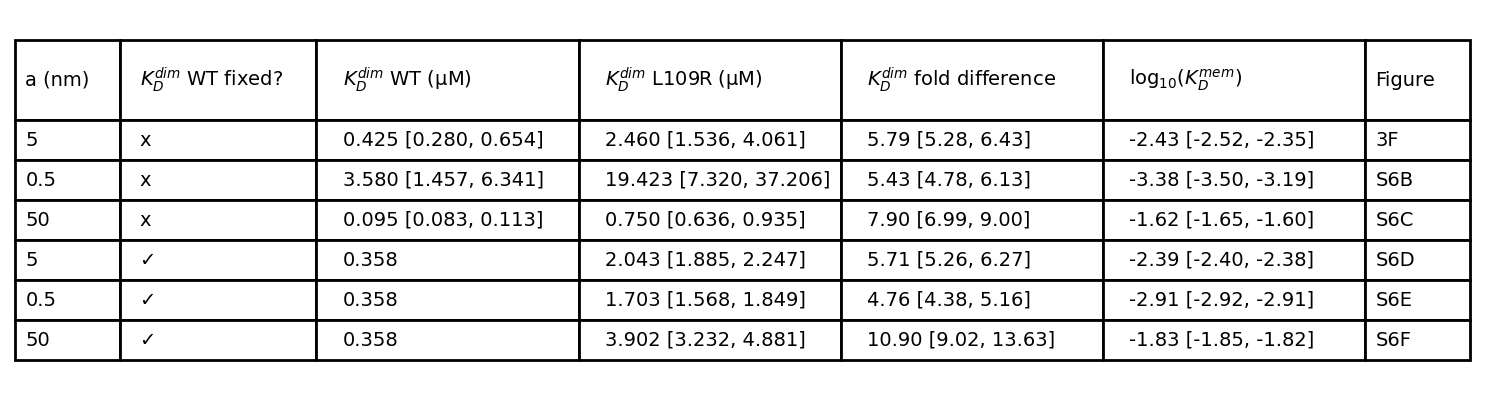

In [22]:
def plot_table(results):
    fig, ax = plt.subplots()
    fontsize = 7
    cell_text = []
    for row in range(len(results)):
        cell_text.append(results.iloc[row])
    widths = np.array([0.08, 0.15, 0.2, 0.2, 0.2, 0.2, 0.08])
    tab = ax.table(cellText=cell_text, colLabels=results.columns, loc='center', colWidths=widths/sum(widths),
                  cellLoc='left', colLoc='left')
    tab.auto_set_font_size(False)
    cellDict = tab.get_celld()
    for i in range(0,len(results.columns)):
        cellDict[(0,i)].set_height(.2)
        for j in range(1,len(cell_text)+1):
            cellDict[(j,i)].set_height(.1)
    tab.set_fontsize(fontsize)
    ax.axis('off')
    fig.set_size_inches(7.5,2)
    fig.subplots_adjust(left=0.01, right=0.98, bottom=0, top=1)
    return fig

fig = plot_table(res)
fig.savefig('Figs/parameters.png', dpi=600, transparent=True)